# Joukowski Transformation
## Kyle Choy - MAE6226

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Shapes Created by Joukowski Transformation

#### First plot circle on the z-plane with radius of 1.5, then transform on Xi plane

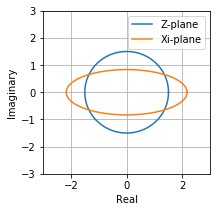

In [2]:
c = 1
R = 1.5
theta = np.linspace(0,2*np.pi,100)
z = (R*np.cos(theta)) + 1j * (R*np.sin(theta))

#Transformation onto Xi plane
xi = z + c/z

size = 3
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.plot(z.real,z.imag,label = 'Z-plane')
plt.plot(xi.real,xi.imag,label = 'Xi-plane')
plt.legend(loc='best', prop={'size':10})

#### Circle radius such that c < R < 2c (e.g., c=1; R=1.2), centered at (xc, yc)=(c − R, 0) on z-plane

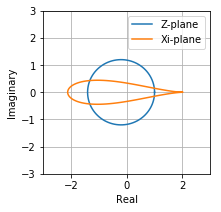

In [3]:
R = 1.2 
xc,yc = c-R,0.

z = (R*np.cos(theta)+xc) + 1j *(R*np.sin(theta))
xi = z + c/z

size = 3
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.plot(z.real,z.imag,label = 'Z-plane')
plt.plot(xi.real,xi.imag,label = 'Xi-plane')
plt.legend(loc='best', prop={'size':10})

#### Put a circle at (xc, yc)=(−Δx, Δy), where Δx and Δy are small positive numbers, e.g. Δx = 0.1 and Δy = 0.1. The radius R of the circle is R=[(c−xc)^2+yc^2]^0.5.

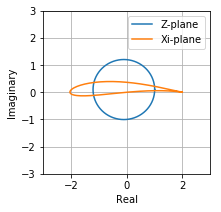

In [16]:
dx = 0.1
dy = 0.1

xc,yc = -dx,dy
R = np.sqrt((c-xc)**2+yc**2)

z = (R*np.cos(theta) + xc) + 1j * (R * np.sin(theta) + yc)
xi = z + c/z

size = 3
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-size,size)
plt.ylim(-size,size)
plt.plot(z.real,z.imag,label = 'Z-plane')
plt.plot(xi.real,xi.imag,label = 'Xi-plane')
plt.legend(loc='best', prop={'size':10})

## Grid points on z-plane

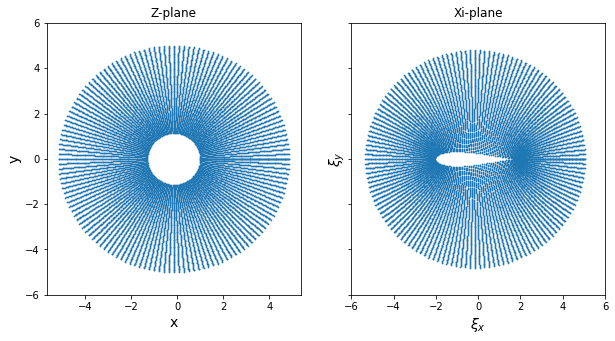

In [91]:
R = 1.15
xc,yc = -0.15,0.0
N_theta, N_r = 145,100
theta = np.linspace(0,2*np.pi,N_theta)
r = np.linspace(R,5,N_r)

r_mesh,theta_mesh = np.meshgrid(r,theta)

z = (r_mesh*np.cos(theta_mesh)+xc) + 1j*(r_mesh*np.sin(theta_mesh)+yc)
xi = z + c/z


f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax1.set_title('Z-plane')
ax1.scatter(z.real,z.imag,s=0.5) 
ax2.set_title('Xi-plane')
ax2.scatter(xi.real,xi.imag,s=0.5)

### Flow over symmetric Joukowski airfoil with zero angle of attack 

Strength of doublet found using the equation

$$R = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$

In [28]:
u_inf,v_inf = 1.0,0.0
u_freestream = u_inf*np.ones((N_theta,N_r))
v_freestream = v_inf*np.ones((N_theta,N_r))
psi_freestream = u_inf*z.imag
kappa = 2*np.pi*u_inf*R**2

In [29]:
def vel_profile_doublet(kappa,x_loc,y_loc,X,Y):
    
    u = -kappa/(2*np.pi) * ((X-x_loc)**2-(Y-y_loc)**2)/((X-x_loc)**2+(Y-y_loc)**2)**2
    
    v = -kappa/(2*np.pi) * 2*(X-x_loc)*(Y-y_loc)/((X-x_loc)**2+(Y-y_loc)**2)**2
    
    return u,v

def streamfunc_doublet(kappa,x_loc,y_loc,X,Y):
    
    psi = -kappa/(2*np.pi)*(Y-y_loc)/((X-x_loc)**2+(Y-y_loc)**2)
    
    return psi

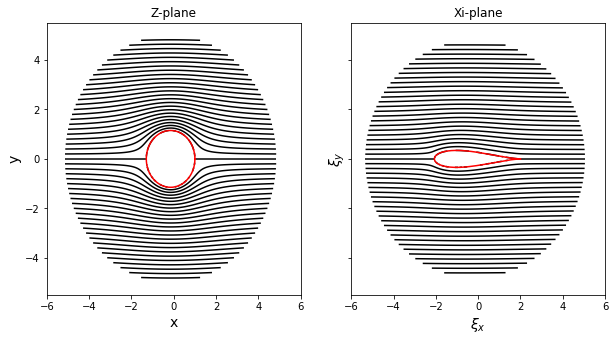

In [55]:
u_dub,v_dub = vel_profile_doublet(kappa,xc,yc,z.real,z.imag)
psi_dub = streamfunc_doublet(kappa,xc,yc,z.real,z.imag)

u = u_dub+u_freestream
v = v_dub+v_freestream

psi = psi_dub + psi_freestream

z_plot = R*np.cos(theta)+xc + 1j*R*np.sin(theta)
xi_plot = z_plot+c/z_plot

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(5)
f.set_figwidth(10)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-6,6)
ax2.set_xlim(-6,6)
ax1.set_title('Z-plane')
ax1.contour(z.real,z.imag,psi,levels = np.linspace(np.min(psi),np.max(psi),51), colors ='k',linestyles='solid') 
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
ax2.contour(xi.real,xi.imag,psi,levels = np.linspace(np.min(psi),np.max(psi),51), colors ='k',linestyles='solid')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')

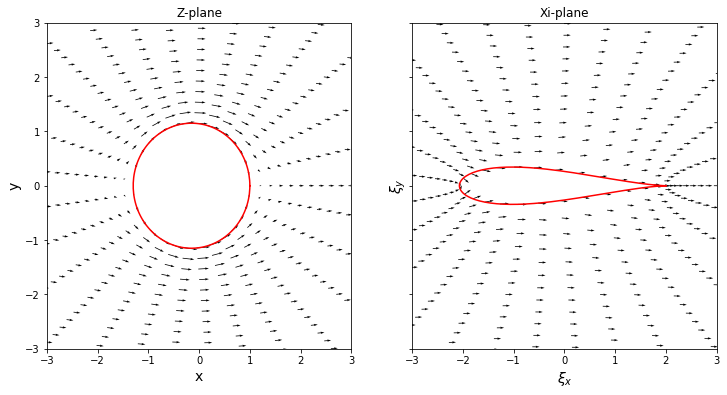

In [92]:
Wz = u - 1j*v

Wxi = Wz/(1-(c/z)**2)

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane')
ax1.quiver(z.real[::5,::5],z.imag[::5,::5],u[::5,::5],v[::5,::5]) #every five data points
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
ax2.quiver(xi.real[::5,::5],xi.imag[::5,::5],Wxi.real[::5,::5],Wxi.imag[::5,::5])
ax2.plot(xi_plot.real,xi_plot.imag,color='r')


In [97]:
print('61st velocity point on airfoil surface is', Wxi[61,0])


61st velocity point on airfoil surface is (1.10633846629-0.523633349298j)


### Pressure Coefficients

The minimum pressure coefficient value on the airfoil surface is -0.687755674092


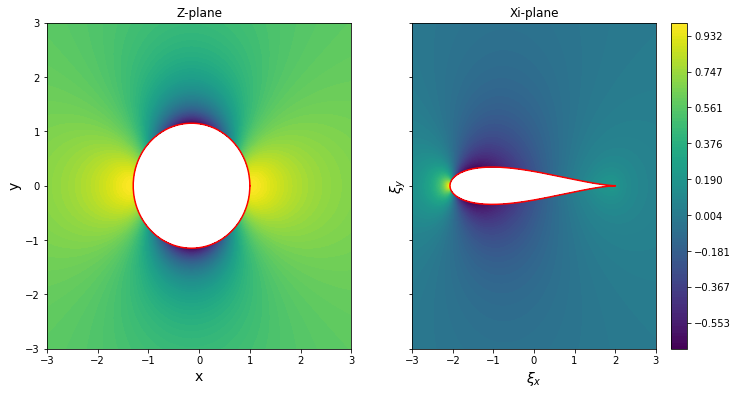

In [121]:
cp_z = 1.0 - (u**2+v**2)/u_inf**2
cp_xi = 1.0 - (Wxi.real**2+Wxi.imag**2)/u_inf**2

f, (ax1, ax2) = plt.subplots(1,2,sharey=True)
f.set_figheight(6)
f.set_figwidth(12)
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('y',fontsize=14)
ax2.set_xlabel(r'$\xi_x$',fontsize=14)
ax2.set_ylabel(r'$\xi_y$',fontsize=14)
ax1.set_xlim(-3,3)
ax2.set_xlim(-3,3)
plt.ylim(-3,3)
ax1.set_title('Z-plane')
ax1.contourf(z.real,z.imag,cp_z,levels = np.linspace(np.min(cp_z),np.max(cp_z),101), cmap ='viridis')
ax1.plot(z_plot.real,z_plot.imag,color='r')
ax2.set_title('Xi-plane')
f2= ax2.contourf(xi.real,xi.imag,cp_xi,levels = np.linspace(np.min(cp_xi),np.max(cp_xi),101), cmap ='viridis')
ax2.plot(xi_plot.real,xi_plot.imag,color='r')
plt.colorbar(f2)



print('The minimum pressure coefficient value on the airfoil surface is', np.min(cp_xi))